## Loan approval prediction 

Q-6. Imagine you have a dataset where you have predicted loan Eligibility using any
4 different classification algorithms. Now you have to build a model which can
predict loan Eligibility and you need to find the accuracy of the model and built-in
docker and use some library to display that in frontend dataset

This is the Dataset You can use this dataset for this question.
dataset-https://www.kaggle.com/datasets/ninzaami/loan-predication

In [105]:
import numpy as np
import pandas as pd 
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from scipy.stats import linregress
from sklearn.metrics import classification_report

In [106]:
df=pd.read_csv(r"train_u6lujuX_CVtuZ9i (1).csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [74]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#Lets segregrate numerical and categorical columns so we can plot and analysis seperately

In [75]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']

print(categorical_columns)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


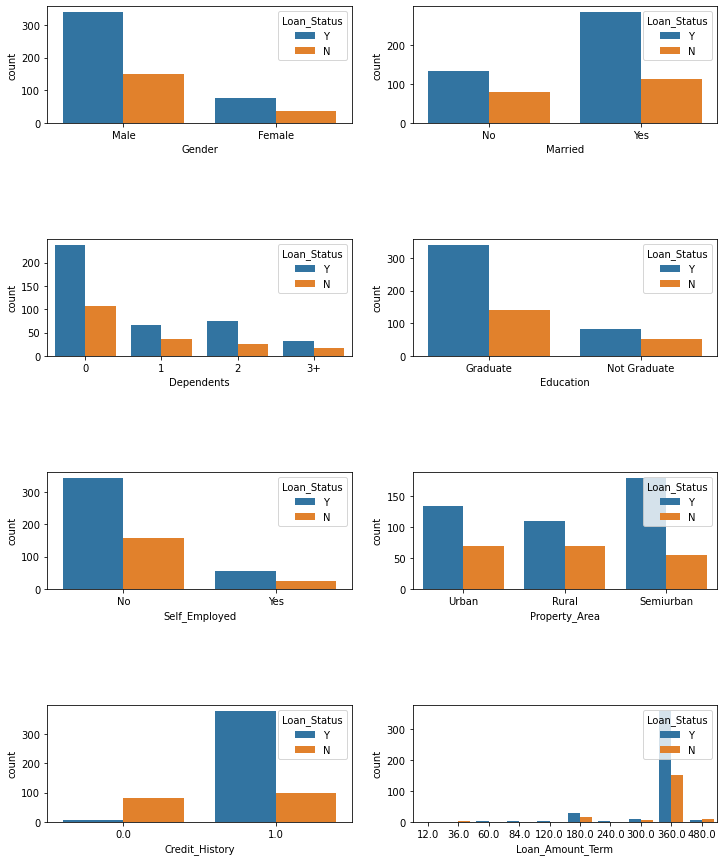

In [76]:
#For categorical columns

### Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

#Messages from plots
a)Loan Approval Status: About 2/3rd of applicants have been granted loan.
b)Sex: There are more Men than Women (approx. 3x)
c)Martial Status: 2/3rd of the population in the dataset is Married; Married applicants are more likely to be granted loans.
d)Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.
e)Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval
f)Employment: 5/6th of population is not self employed.
g)Property Area: More applicants from Semi-urban and also likely to be granted loans.
h)Applicant with credit history are far more likely to be accepted.
i)Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).

In [77]:
df['CoapplicantIncome_not_null'] = df.apply(lambda x : '+' if x['CoapplicantIncome']>0 else '-',axis = 1)

<AxesSubplot:xlabel='Married', ylabel='count'>

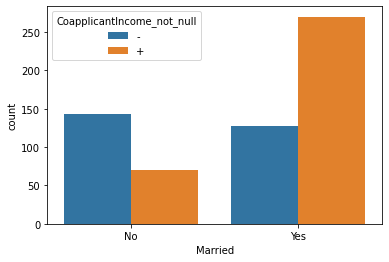

In [78]:
sns.countplot(x='Married',hue='CoapplicantIncome_not_null',data = df)

### Dealing with null values

In [79]:
df['Married'] = df.Married.fillna(df.apply(lambda x: 'Yes' if x['CoapplicantIncome'] > 0 else 'No', axis=1))

In [80]:
df.Married.value_counts()

Yes    399
No     215
Name: Married, dtype: int64

In [81]:
df.Dependents = df.Dependents.fillna('0')
df.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [82]:
df_gender = df.groupby('Gender').mean()
df_gender

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Gender,,,,,
Female,4643.473214,1108.008929,126.697248,352.293578,0.831683
Male,5446.460123,1742.932352,149.265957,339.665272,0.847007


In [83]:
df_gender.ApplicantIncome[0]

4643.473214285715

In [84]:
gender_applicant_income_limit = df_gender.ApplicantIncome.mean()
gender_applicant_income_limit

5044.9666684925505

In [85]:
df['Gender'] = df.Gender.fillna(df.apply(lambda x: 'Female' if x['ApplicantIncome'] < gender_applicant_income_limit else 'Male', axis=1))

In [86]:
df['Self_Employed'] = df.Self_Employed.fillna(df.apply(lambda x: 'Yes' if x['CoapplicantIncome'] == 0 else 'No', axis=1))

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

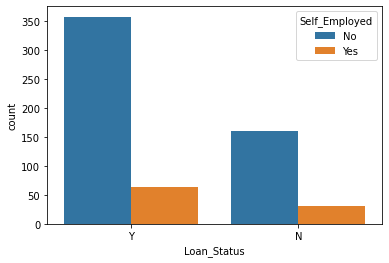

In [87]:
sns.countplot(x='Loan_Status',hue='Self_Employed',data = df)

In [88]:
#select the rows without Nan values in LoanAmount column
df_test = df[~df.LoanAmount.isna()]
df_test.shape

(592, 14)

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

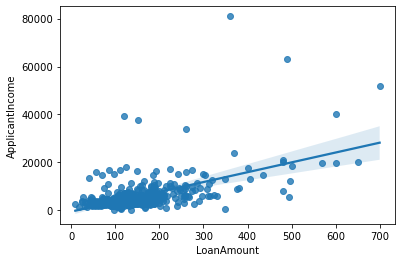

In [89]:
# Plot a scatterplot of LoanAmoun & ApplicantIncome with a linear regression line
sns.regplot(data=df_test,x='LoanAmount',y='ApplicantIncome')

In [90]:
# Fit a linear regression model to total_bill and tip
slope, intercept, rvalue, pvalue, stderr = linregress(df_test.LoanAmount, df_test.ApplicantIncome)

print("Slope:", slope)

Slope: 41.11736153470159


In [91]:
# Fit a linear regression model to total_bill and tip
slope, intercept, rvalue, pvalue, stderr = linregress(df_test.LoanAmount, df_test.ApplicantIncome)

print("Slope:", slope)

Slope: 41.11736153470159


In [92]:
df.LoanAmount = df.LoanAmount.fillna(df.apply(lambda x : x['ApplicantIncome']/slope,axis=1))

In [93]:
loan_term_counts = df.Loan_Amount_Term.value_counts()
loan_term_labels = df.Loan_Amount_Term.value_counts().index.tolist()
len(loan_term_counts), len(loan_term_labels)

(10, 10)

In [94]:
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(360.0 )
df.Credit_History = df.Credit_History.astype(str)

In [95]:
df.Loan_Status = df.Loan_Status.astype(str)

In [96]:
df = df.replace({'Credit_History':{'nan':df.apply(lambda x : '1.0' if x['Loan_Status']=='Y' else '0.0',axis=1)}})

In [97]:
df = df.drop(['CoapplicantIncome_not_null'],axis=1)

In [98]:
df.replace({'Gender':{'Female':0,'Male':1}},inplace=True)
df.replace({'Married':{'Yes':1,'No':0}},inplace=True)
df.replace({'Dependents':{'0':0,'1':1,'2':2,'3+':3}},inplace=True)
df.replace({'Education':{'Graduate':0,'Not Graduate':1}},inplace=True)
df.replace({'Self_Employed':{'No':0,'Yes':1}},inplace=True)
df.replace({'Credit_History':{'1.0':1,'0.0':0}},inplace=True)
df.replace({'Property_Area':{'Semiurban':0,'Urban':1,'Rural':2}},inplace=True)
df.replace({'Loan_Status':{'Y':1,'N':0}},inplace=True)

## Data split 

In [99]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Loan_ID_LP002959,Loan_ID_LP002960,Loan_ID_LP002961,Loan_ID_LP002964,Loan_ID_LP002974,Loan_ID_LP002978,Loan_ID_LP002979,Loan_ID_LP002983,Loan_ID_LP002984,Loan_ID_LP002990
0,1,0,0,0,0,5849,0.0,142.251345,360.0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,...,0,0,0,0,0,0,0,0,0,0


In [107]:
X = df.drop(['Loan_Status','Dependents','Loan_Amount_Term','Loan_ID'],axis = 1)
y = df.Loan_Status

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.1,stratify=y,random_state = 11)

In [47]:
X.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
Property_Area        0
dtype: int64

### SVM 

In [48]:
svm_classifier = svm.SVC(kernel = 'linear') #SVC stands for a classifier
svm_classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [49]:
y_train_preds_svm = svm_classifier.predict(x_train)
train_acc_score_svm = accuracy_score(y_true=y_train,y_pred=y_train_preds_svm)
train_acc_score_svm

0.7952898550724637

In [50]:
y_test_preds_svm = svm_classifier.predict(x_test)
test_acc_score_svm = accuracy_score(y_true=y_test,y_pred=y_test_preds_svm)
test_acc_score_svm

0.8709677419354839

In [51]:
print(classification_report(y_test,y_test_preds_svm))

              precision    recall  f1-score   support

           0       1.00      0.58      0.73        19
           1       0.84      1.00      0.91        43

    accuracy                           0.87        62
   macro avg       0.92      0.79      0.82        62
weighted avg       0.89      0.87      0.86        62



### XGB 

In [52]:
xgb_classifier = xgb.XGBRFClassifier()
xgb_classifier.fit(x_train,y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                objective='binary:logistic', predictor=None, random_state=None,
                reg_alpha=None, ...)

In [53]:
y_train_preds_xgb = xgb_classifier.predict(x_train)
train_acc_score_xgb = accuracy_score(y_true=y_train,y_pred=y_train_preds_xgb)
train_acc_score_xgb

0.842391304347826

In [54]:
y_test_preds_xgb = xgb_classifier.predict(x_test)
test_acc_score_xgb = accuracy_score(y_true=y_test,y_pred=y_test_preds_xgb)
test_acc_score_xgb

0.9032258064516129

In [55]:
print(classification_report(y_test,y_test_preds_xgb))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81        19
           1       0.88      1.00      0.93        43

    accuracy                           0.90        62
   macro avg       0.94      0.84      0.87        62
weighted avg       0.92      0.90      0.90        62



### Decision tree 

In [102]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [103]:
y_train_preds_tree_clf = rf_clf.predict(x_train)
train_acc_score_tree_clf = accuracy_score(y_true=y_train,y_pred=y_train_preds_tree_clf)
train_acc_score_tree_clf

1.0

In [104]:
y_test_preds_tree_clf = rf_clf.predict(x_test)
test_acc_score_tree_clf = accuracy_score(y_true=y_test,y_pred=y_test_preds_tree_clf)
test_acc_score_tree_clf

0.8870967741935484

### Random forest 

In [60]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [62]:
y_train_preds_rf_clf = rf_clf.predict(x_train)
train_acc_score_rf_clf = accuracy_score(y_true=y_train,y_pred=y_train_preds_rf_clf)
train_acc_score_rf_clf

1.0

In [63]:
y_test_preds_rf_clf = rf_clf.predict(x_test)
test_acc_score_rf_clf = accuracy_score(y_true=y_test,y_pred=y_test_preds_rf_clf)
test_acc_score_rf_clf

0.8870967741935484

### Logistic regression 

In [65]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
y_train_preds_lr = lr.predict(x_train)
train_acc_score_lr = accuracy_score(y_true=y_train,y_pred=y_train_preds_lr)
train_acc_score_lr

0.8242753623188406

In [67]:
y_test_preds_lr = lr.predict(x_test)
test_acc_score_lr = accuracy_score(y_true=y_test,y_pred=y_test_preds_lr)
test_acc_score_lr

0.9032258064516129